<a href="https://colab.research.google.com/github/Kim-Jeong-Ju/AI_Modeling/blob/main/Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Drive Connection and Packages Importation**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import MDS, TSNE

import graphviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
%matplotlib inline

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Dimensionality Reduction, 차원 축소**

### **① PCA(Principal Components Analysis), 주성분 분석**  
PCA는 각각의 Input feature들은 centeralization(zero mean) + Unit Variance를 가져야 좋은 성능을 보임 => "Normalization" 필요

(569, 30) (569,)

(569, 30) (569, 2)



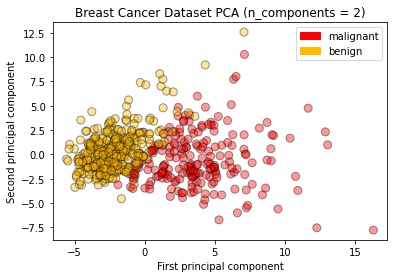

In [ ]:
# Load data set -> Breast Cancer data set
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)
print(X_cancer.shape, y_cancer.shape)
print()


# Input Feature Normalization before applying PCA
X_normalized = StandardScaler().fit(X_cancer).transform(X_cancer)
X_pca = PCA(n_components=2).fit(X_normalized).transform(X_normalized)
print(X_cancer.shape, X_pca.shape)
print()

# Plot the PCA-transformed version of the Breast Cancer data set
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FF0000', '#FFBB00', '#2F9D27', '#0054FF']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

plot_labelled_scatter(X_pca, y_cancer, ['malignant', 'benign'])   # malignant = 악성 종양, benign = 비악성 종양
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Breast Cancer Dataset PCA (n_components = 2)');

(59, 4) (59, 1)

(59, 4) (59, 2)



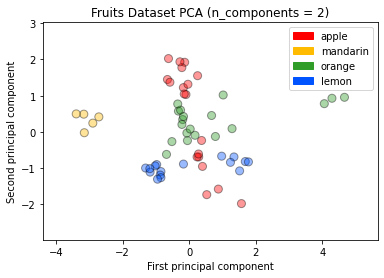

In [ ]:
# Load data set -> Fruits Classification data set
fruits = pd.read_table('/content/drive/MyDrive/Colab Notebooks/data/fruit_data_with_colors.txt')
X_fruits = np.asarray(fruits[['mass', 'width', 'height', 'color_score']])
y_fruits = np.asarray(fruits[['fruit_label']] - 1)
print(X_fruits.shape, y_fruits.shape)
print()


# Input Feature Normalization before applying PCA
X_normalized = StandardScaler().fit(X_fruits).transform(X_fruits)
X_pca = PCA(n_components = 2).fit(X_normalized).transform(X_normalized)
print(X_fruits.shape, X_pca.shape)
print()

# Plot the PCA-transformed version of the Fruit Classification data set
def plot_labelled_scatter(X, y, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FF0000', '#FFBB00', '#2F9D27', '#0054FF']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X[:, 0], X[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.legend(handles=h)

plot_labelled_scatter(X_pca, y_fruits, ['apple','mandarin','orange','lemon'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Fruits Dataset PCA (n_components = 2)');

### **② MDS(Multi-Dimensional Scaling), 다차원척도법**

(569, 30) (569, 2)

(59, 4) (59, 2)



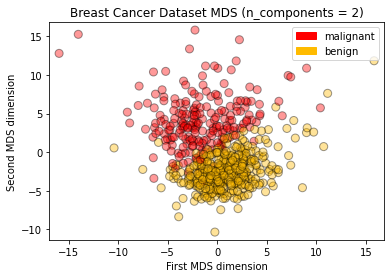

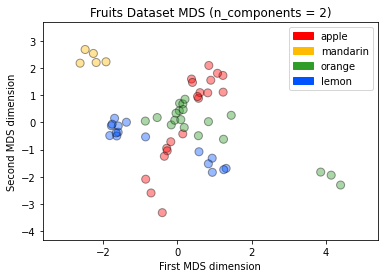

In [ ]:
# Breast Cancer Input Feature Normalization before applying MDS
X_normalized = StandardScaler().fit_transform(X_cancer)   # fit_transform() => fit()이후 transform()을 순차적으로 실행
X_mds = MDS(n_components=2).fit_transform(X_normalized)
print(X_cancer.shape, X_mds.shape)
print()

# Plot the MDS-transformed version of the Breast Cancer data set
plot_labelled_scatter(X_mds, y_cancer, ['malignant', 'benign'])
plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Breast Cancer Dataset MDS (n_components = 2)');


# Fruits Classification Input Feature Normalization before applying MDS
X_normalized = StandardScaler().fit_transform(X_fruits)
X_mds = MDS(n_components=2).fit_transform(X_normalized)
print(X_fruits.shape, X_mds.shape)
print()

# Plot the MDS-transformed version of the Fruit Classification data set
plot_labelled_scatter(X_mds, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First MDS dimension')
plt.ylabel('Second MDS dimension')
plt.title('Fruits Dataset MDS (n_components = 2)');

### **③ t-SNE(t-distributed Stochastic Neighbor Embedding)**

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(569, 30) (569, 2)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(59, 4) (59, 2)



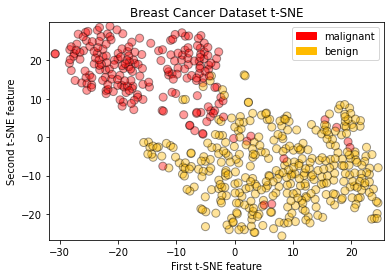

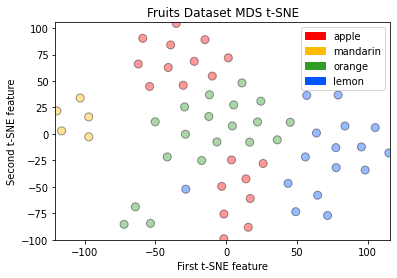

In [ ]:
# Breast Cancer Input Feature Normalization before applying t-SNE
X_normalized = StandardScaler().fit_transform(X_cancer)   # fit_transform() => fit()이후 transform()을 순차적으로 실행
X_tsne = TSNE(random_state=0).fit_transform(X_normalized)
print(X_cancer.shape, X_tsne.shape)
print()

# Plot the t-SNE-transformed version of the Breast Cancer data set
plot_labelled_scatter(X_tsne, y_cancer, ['malignant', 'benign'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Breast Cancer Dataset t-SNE');


# Fruits Classification Input Feature Normalization before applying t-SNE
X_normalized = StandardScaler().fit_transform(X_fruits)
X_tsne = TSNE(random_state=0).fit_transform(X_normalized)
print(X_fruits.shape, X_tsne.shape)
print()

# Plot the t-SNE-transformed version of the Fruit Classification data set
plot_labelled_scatter(X_tsne, y_fruits, ['apple', 'mandarin', 'orange', 'lemon'])
plt.xlabel('First t-SNE feature')
plt.ylabel('Second t-SNE feature')
plt.title('Fruits Dataset MDS t-SNE');